**Question 2**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Mcheng1973/visualization/refs/heads/main/assignment/data/airbnb_hw.csv'
df = pd.read_csv(url)
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [ ]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0



The majority available properties are Apartments, houses, lofts and condos. There are some properties that have very few amounts such as lighthouse, cabin, treehouse, etc... For apartments, majority available include the entire property but for houses, the majority available are private rooms.

In [ ]:
!pip install seaborn


<Axes: xlabel='Price', ylabel='Count'>

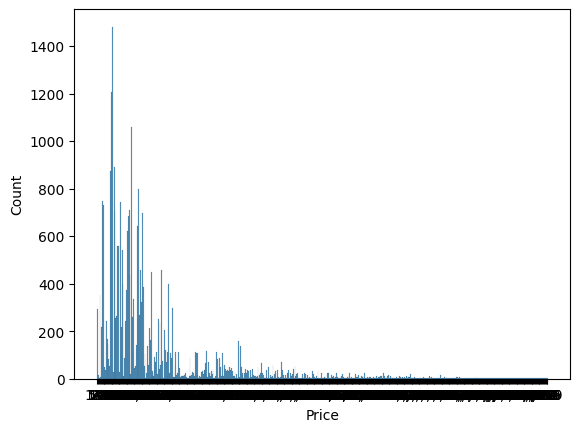

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

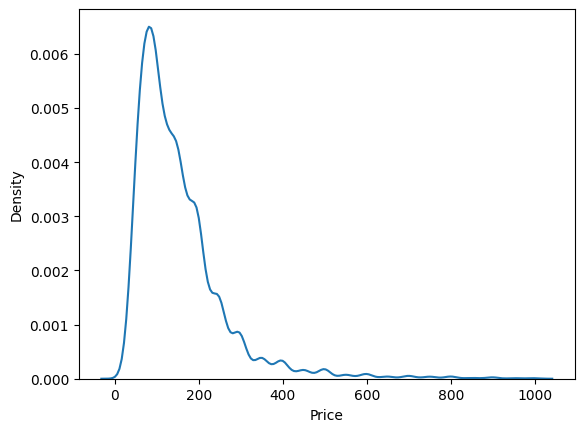

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df = df.dropna(subset=['Price'])
sns.kdeplot(data=df,x='Price')

<Axes: xlabel='Price'>

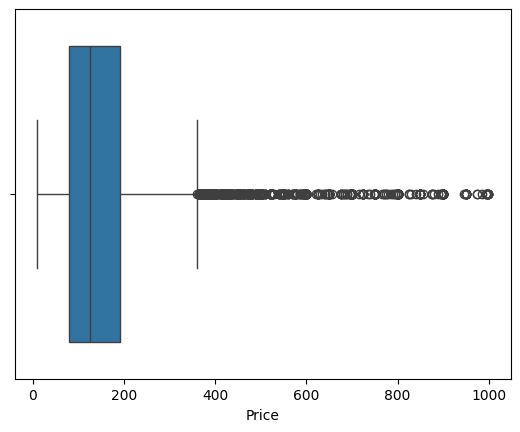

In [ ]:
sns.boxplot(data=df,x='Price')


In [ ]:
df['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [ ]:
import numpy as np

<Axes: xlabel='Price_log', ylabel='Count'>

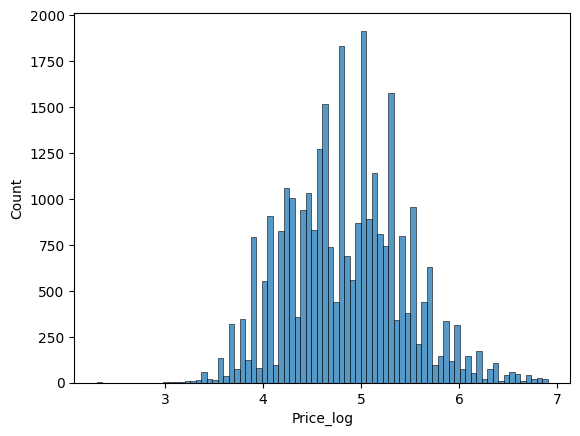

In [ ]:
df.loc[:, 'Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

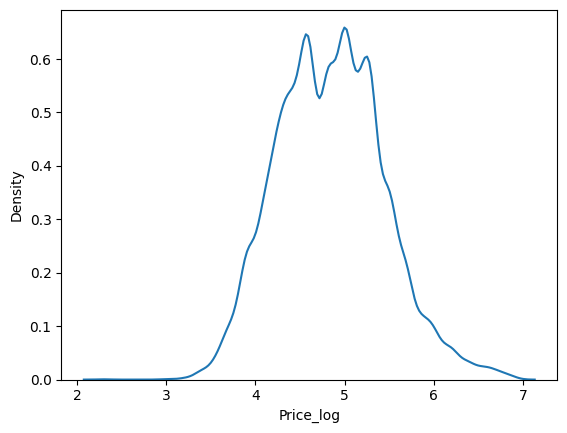

In [ ]:
sns.kdeplot(data=df,x='Price_log')

<Axes: xlabel='Price_log'>

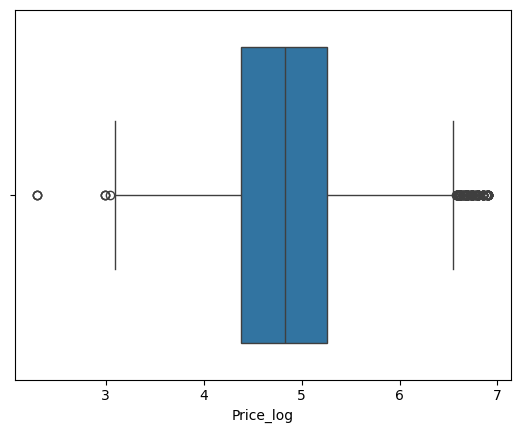

In [ ]:
sns.boxplot(data=df,x='Price_log')

In [ ]:
df['Price_log'].describe()

,Price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


<Axes: xlabel='Beds', ylabel='Price_log'>

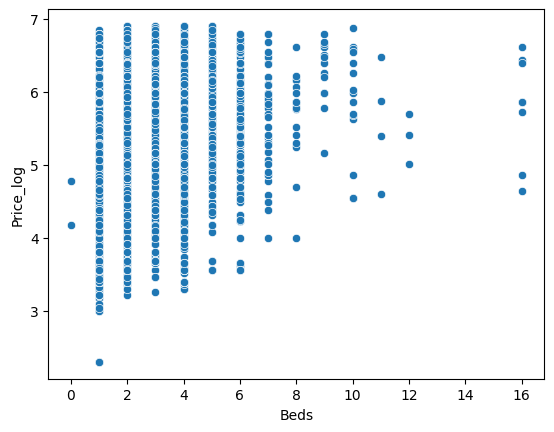

In [ ]:
sns.scatterplot( data=df, x='Beds', y='Price_log')


In [ ]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()


Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0



There is a direct correlation between beds and price. As the number of beds increases, so does the price. The standard deviation varies quite a bit.

<Axes: xlabel='Beds', ylabel='Price_log'>

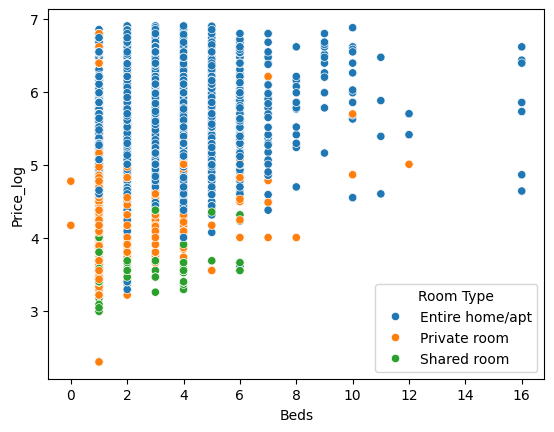

In [ ]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')


In [ ]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                        
                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0

Entire home/apt have the highest prices on average, as well as the highest standard deviation. The median seems like an adequate measure of the data because it seems like the standard deviation is pretty high.

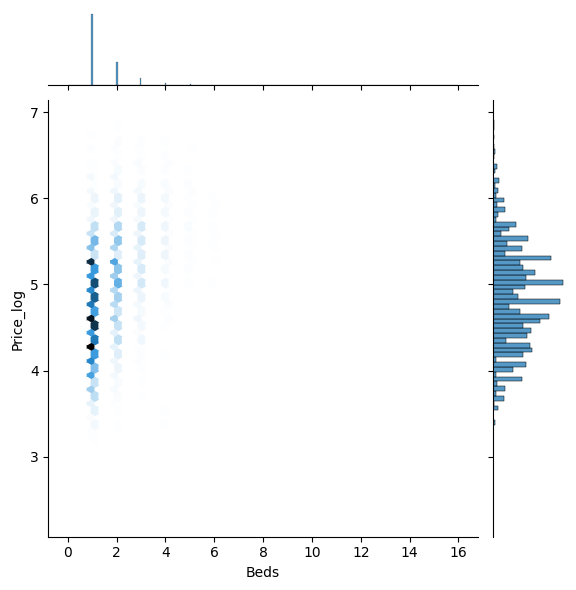

In [ ]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')



Most of the properties availabe have 1-2 beds. Most properties are in a price band of 5-6. Even though there were outliers, most data points are within the right bounds.

**Question 4 (using cms.gov data)**

2. Yes, for categorical variables, the data dictionary provides ways that missing values are handled. However, for numeric variables it does not provide a description for how missing variables are treated. Thus, the data dictionary is a good baseline for defining variables, but it is not completely thorough.

3.
ACW_D_ERVIST (ER visit in previous rounds)
ACW_D_OPVIST (Outpatient visit in previous rounds)
ACW_OPDSURGY (Reason for outpatient visit: surgery)

These variables capture healthcare utilization, specifically emergency room (ER) and outpatient (OP) visits, as well as whether the outpatient visit was for surgery. Analyzing these variables together can provide insights into the frequency of healthcare utilization and the intensity of care provided to the population.

In [ ]:
from google.colab import files

uploaded = files.upload()



Saving sfpuf2021_2_winter.csv to sfpuf2021_2_winter.csv


In [ ]:

import pandas as pd
import numpy as np
df = pd.read_csv('sfpuf2021_2_winter.csv')

df['ACW_D_ERVIST'].replace({'D': np.nan, 'R': np.nan, '.': np.nan}, inplace=True)
df['ACW_D_OPVIST'].replace({'D': np.nan, 'R': np.nan, '.': np.nan}, inplace=True)
df['ACW_OPDSURGY'].replace({'D': np.nan, 'R': np.nan, '.': np.nan}, inplace=True)

# Convert categorical data to meaningful labels
df['ACW_D_ERVIST'] = df['ACW_D_ERVIST'].replace({1: 'Yes', 2: 'No'})
df['ACW_D_OPVIST'] = df['ACW_D_OPVIST'].replace({1: 'Yes', 2: 'No'})
df['ACW_OPDSURGY'] = df['ACW_OPDSURGY'].replace({1: 'Indicated', 0: 'Not Indicated'})

# Print the cleaned data
print(df[['ACW_D_ERVIST', 'ACW_D_OPVIST', 'ACW_OPDSURGY']].head())



  ACW_D_ERVIST ACW_D_OPVIST ACW_OPDSURGY
0            2            2          NaN
1            1            1            0
2            2            1            0
3            2            1            0
4            2            2          NaN


<ipython-input-4-9c4d930b5f35>:3: DtypeWarning: Columns (19,26,27,29,30,31,32,33,34,35,36,37,38,53,68,70,71,72,76,78,79,80,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sfpuf2021_2_winter.csv')
<ipython-input-4-9c4d930b5f35>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ACW_D_ERVIST'].replace({'D': np.nan, 'R': np.nan, '.': np.nan}, inplace=True)
<ipython-input-4-9c4d930b5f35>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chai

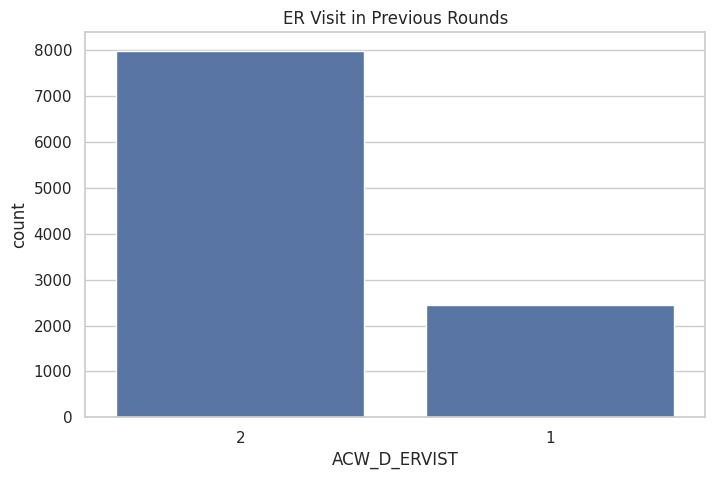

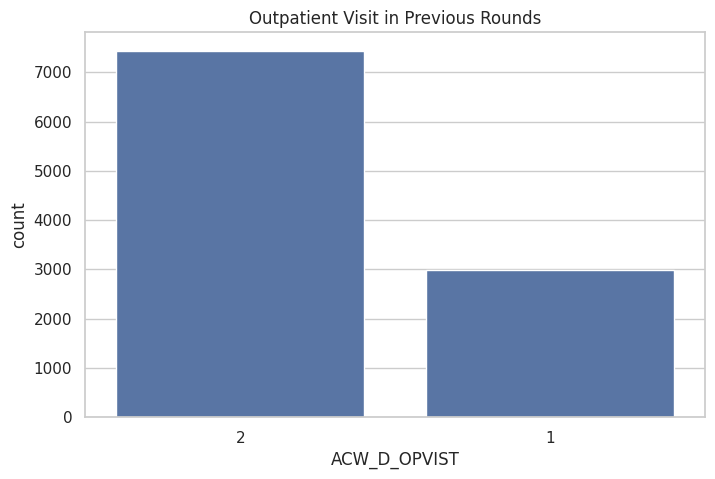

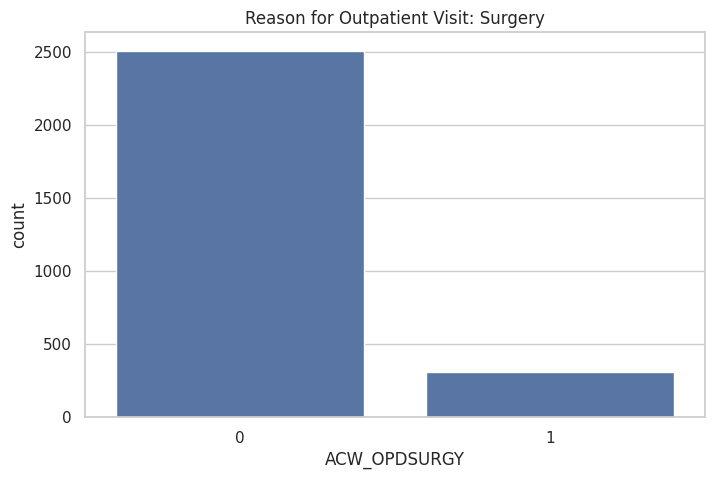

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Bar graph for ACW_D_ERVIST
plt.figure(figsize=(8, 5))
sns.countplot(x='ACW_D_ERVIST', data=df)
plt.title('ER Visit in Previous Rounds')
plt.show()

# Bar graph for ACW_D_OPVIST
plt.figure(figsize=(8, 5))
sns.countplot(x='ACW_D_OPVIST', data=df)
plt.title('Outpatient Visit in Previous Rounds')
plt.show()

# Bar graph for ACW_OPDSURGY
plt.figure(figsize=(8, 5))
sns.countplot(x='ACW_OPDSURGY', data=df)
plt.title('Reason for Outpatient Visit: Surgery')
plt.show()


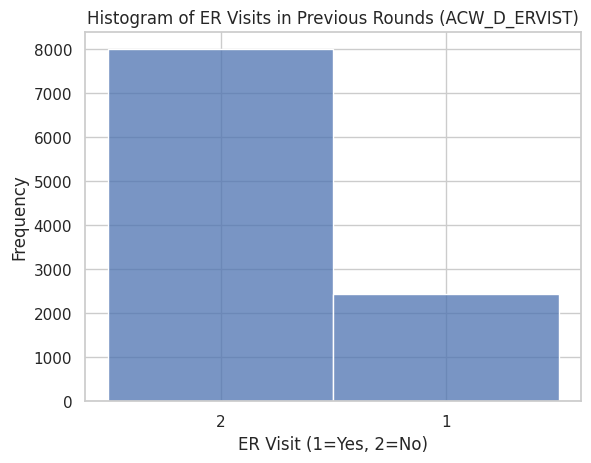

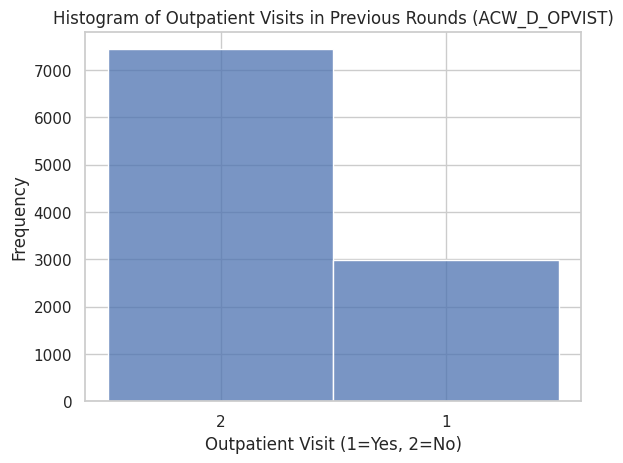

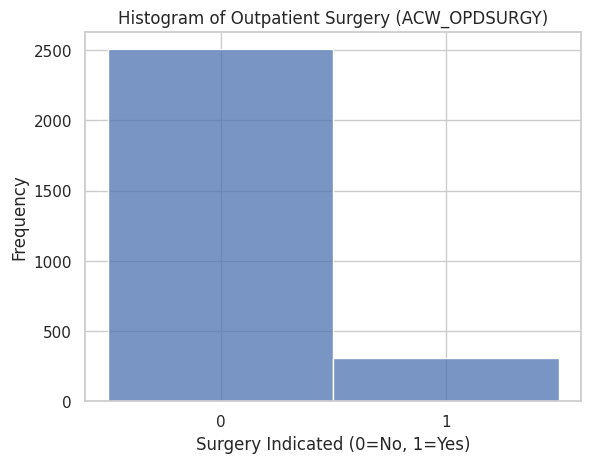

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for ACW_D_ERVIST (ER visit in previous rounds)
sns.histplot(df['ACW_D_ERVIST'], kde=False, discrete=True)
plt.title('Histogram of ER Visits in Previous Rounds (ACW_D_ERVIST)')
plt.xlabel('ER Visit (1=Yes, 2=No)')
plt.ylabel('Frequency')
plt.show()

# Histogram for ACW_D_OPVIST (Outpatient visit in previous rounds)
sns.histplot(df['ACW_D_OPVIST'], kde=False, discrete=True)
plt.title('Histogram of Outpatient Visits in Previous Rounds (ACW_D_OPVIST)')
plt.xlabel('Outpatient Visit (1=Yes, 2=No)')
plt.ylabel('Frequency')
plt.show()

# Histogram for ACW_OPDSURGY (Reason for outpatient visit: surgery)
sns.histplot(df['ACW_OPDSURGY'], kde=False, discrete=True)
plt.title('Histogram of Outpatient Surgery (ACW_OPDSURGY)')
plt.xlabel('Surgery Indicated (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.show()


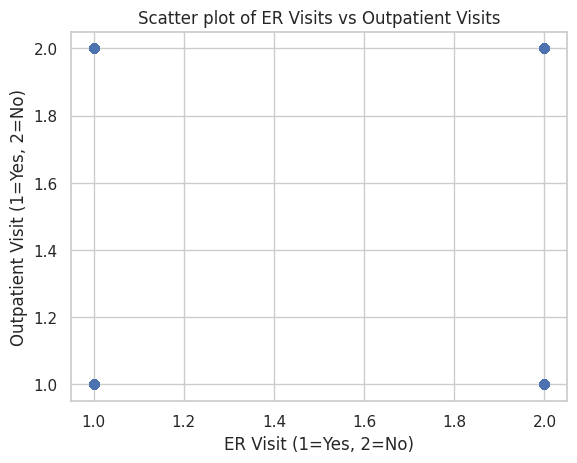

In [ ]:
# Scatter plot between ACW_D_ERVIST and ACW_D_OPVIST
df['ACW_D_ERVIST'] = pd.to_numeric(df['ACW_D_ERVIST'], errors='coerce')
df['ACW_D_OPVIST'] = pd.to_numeric(df['ACW_D_OPVIST'], errors='coerce')

plt.scatter(df['ACW_D_ERVIST'], df['ACW_D_OPVIST'], alpha=0.5)
plt.title('Scatter plot of ER Visits vs Outpatient Visits')
plt.xlabel('ER Visit (1=Yes, 2=No)')
plt.ylabel('Outpatient Visit (1=Yes, 2=No)')
plt.show()


In [ ]:
summary = df[['ACW_D_ERVIST', 'ACW_D_OPVIST', 'ACW_OPDSURGY']].describe()
print(summary)


       ACW_D_ERVIST  ACW_D_OPVIST
count  10440.000000  10434.000000
mean       1.765805      1.712958
std        0.423515      0.452403
min        1.000000      1.000000
25%        2.000000      1.000000
50%        2.000000      2.000000
75%        2.000000      2.000000
max        2.000000      2.000000


The five-number summary for ACW_D_ERVIST and ACW_D_OPVIST reveals that both variables have a high count, indicating a substantial amount of data. Also, the mean values (approximately 1.77 and 1.71) suggest that the majority of visits are coded as "2" (No visits). The standard deviations (0.42 and 0.45) indicate some variability in the data. The 25th, 50th (median), and 75th percentiles are all "2," indicating that most patients did not visit the ER or outpatient services. Both variables range from 1 to 2, showing limited response categories.